In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [338]:
# read the dataset

df = pd.read_csv('../data_source/used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [339]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [341]:
df.columns.value_counts()

brand           1
model           1
model_year      1
milage          1
fuel_type       1
engine          1
transmission    1
ext_col         1
int_col         1
accident        1
clean_title     1
price           1
Name: count, dtype: int64

In [342]:
df.shape

(4009, 12)

In [343]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand,4009,57,Ford,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,4009,1898,M3 Base,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_year,4009.0,NaN,NaN,NaN,2015.51559,6.104816,1974.0,2012.0,2017.0,2020.0,2024.0
milage,4009,2818,"110,000 mi.",16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,3839,7,Gasoline,3309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,4009,1146,2.0L I4 16V GDI DOHC Turbo,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,4009,62,A/T,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ext_col,4009,319,Black,905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_col,4009,156,Black,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accident,3896,2,None reported,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [344]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [345]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [346]:
df['accident'].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

There are 170 missing values for fuel_type and 113 missing values for accident .
1. So for accident we have these unique keys and their values for accident -
     all the 113 empty values in accident has a new category now - No Information"
2. for 

In [347]:
df['accident'] = df['accident'].fillna('No information')
df['accident'].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
No information                             113
Name: count, dtype: int64

In [348]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [349]:
df['fuel_type'] = df['fuel_type'].fillna('Unknown Fuel Type')
df['fuel_type'].value_counts()

fuel_type
Gasoline             3309
Hybrid                194
Unknown Fuel Type     170
E85 Flex Fuel         139
Diesel                116
–                      45
Plug-In Hybrid         34
not supported           2
Name: count, dtype: int64

In [350]:
# after handling missing values in fuel type we unify the weird/different categories
df['fuel_type'] = df['fuel_type'].replace('–', 'Unknown Fuel Type')
df['fuel_type'] = df['fuel_type'].replace('not supported', 'Other')
df['fuel_type'].value_counts()


# ✔ 3. Show ALL rows containing a certain value
# df[df['fuel_type'] == '–']

# ✔ 4. Show random samples from the column
# df['fuel_type'].sample(10)

# ✔ 5. Show unique values with length (to detect spaces or Unicode)
# df['fuel_type'].apply(lambda x: (x, len(x))).unique()
# This helps detect hidden characters like:
# 1.trailing spaces
# 2.Unicode characters
# 3. dashes of different types

fuel_type
Gasoline             3309
Unknown Fuel Type     215
Hybrid                194
E85 Flex Fuel         139
Diesel                116
Plug-In Hybrid         34
Other                   2
Name: count, dtype: int64

Rechecking 
1. if still there are any missing values now after fixing for fuel_type & accident
2. if clean_title column has been dropped or not

In [351]:
print("dataset updated columns -----\n",df.columns)
print("\nchecking missing values after updating accident & fuel_type columns -----\n",df.isnull().sum())

dataset updated columns -----
 Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

checking missing values after updating accident & fuel_type columns -----
 brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      0
ext_col           0
int_col           0
accident          0
clean_title     596
price             0
dtype: int64


Text preprocessing for converting categorical(string) cols to numeric cols

In [352]:
df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)

In [353]:
df['milage'] = df['milage'].str.replace(',','').str.replace('mi.', '', regex=False).astype(float)

In [354]:
df['engine_num'] = df['engine'].str.extract(r'(\d\.\d)').astype(float)


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     4009 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      4009 non-null   object 
 10  clean_title   3413 non-null   object 
 11  price         4009 non-null   float64
 12  engine_num    3906 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 407.3+ KB


In [356]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Unknown Fuel Type',
       'Diesel', 'Plug-In Hybrid', 'Other'], dtype=object)

In [357]:
# df['accident'].value_counts()

# Now make a binary flag:
df['accident_flag'] = df['accident'].apply(lambda x:0 if x == "None reported" else 1)

In [358]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_num,accident_flag
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,0.0,1
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8,1
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,3.5,0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,4.0,0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0,0


In [359]:
df.isnull().sum()

brand              0
model              0
model_year         0
milage             0
fuel_type          0
engine             0
transmission       0
ext_col            0
int_col            0
accident           0
clean_title      596
price              0
engine_num       103
accident_flag      0
dtype: int64

In [360]:
# handling the missing value in engine_num column
# fill the missing values with median value of the column engine_num
df['engine_num'] = df['engine_num'].fillna(df['engine_num'].median())
print("Number of missing values --->", df['engine_num'].isnull().sum())

Number of missing values ---> 0


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          4009 non-null   object 
 1   model          4009 non-null   object 
 2   model_year     4009 non-null   int64  
 3   milage         4009 non-null   float64
 4   fuel_type      4009 non-null   object 
 5   engine         4009 non-null   object 
 6   transmission   4009 non-null   object 
 7   ext_col        4009 non-null   object 
 8   int_col        4009 non-null   object 
 9   accident       4009 non-null   object 
 10  clean_title    3413 non-null   object 
 11  price          4009 non-null   float64
 12  engine_num     4009 non-null   float64
 13  accident_flag  4009 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 438.6+ KB


# Observation - 
1. Data is clean now with 0 missing values for all the columns
2. column clean_title - removed

# Step 3: Univariate EDA - understanding one column at a time, individually.
1. Identifying numeric features & categorical features 
2. Numeric Features - price, mileage_num, engine_num, model_year, car_age
3. Categorical Features - brand, fuel_type, transmission, accident, ext_col, int_col

## Understanding the price ---> Target Column

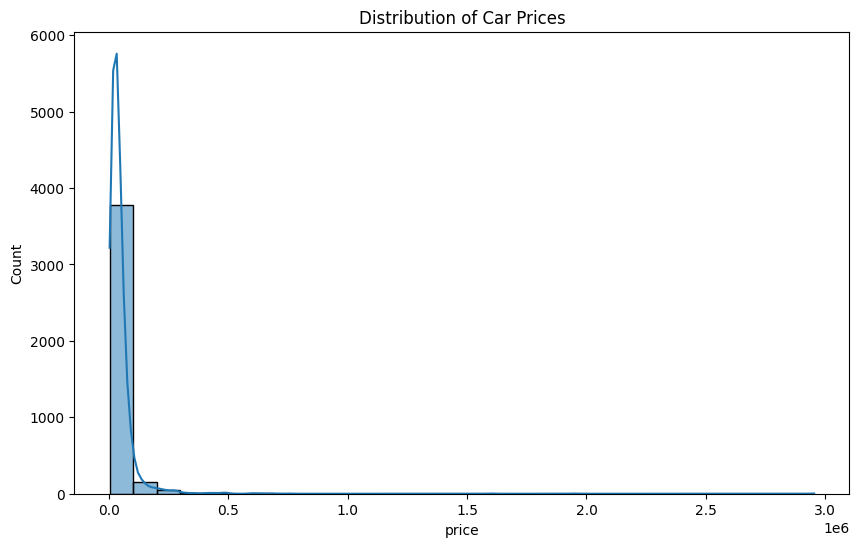

In [362]:
# distribution plot for price column
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True, bins =30)
plt.title('Distribution of Car Prices')
plt.show()

# inferences:
# 1. The distribution of car prices is right-skewed, indicating that most cars are priced lower, with a few high-priced outliers.
# 2. The peak of the distribution suggests that a significant number of cars are priced around $15,000 to $20,000.
# 3. The presence of a long tail on the right side indicates that there are some expensive cars in the dataset, but they are relatively rare.
# 4. The KDE curve helps visualize the overall trend of car prices, showing a gradual decline in frequency as prices increase.
# 5. This information can be useful for understanding the market dynamics and for making pricing decisions in the used car market. 
# 6. The compression of values on the left and the extended tail suggest that the distribution is log-normal, and log-transformation may help stabilize variance during modeling.


<Axes: xlabel='price', ylabel='Count'>

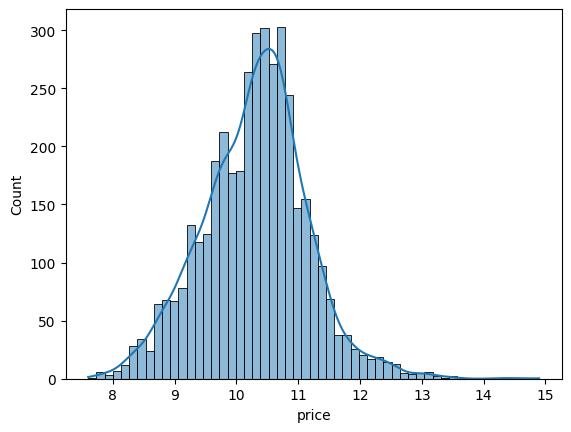

In [363]:
# apply log transformation to price column, to see the actual distribution
sns.histplot(np.log1p(df['price']), kde=True)

# inference:
1. The log-transformed distribution of car prices appears more symmetric and closer to a normal distribution compared to the original right-skewed distribution.
2. Before log → Extremely skewed (long tail)
3. After log → Looks like a bell-shaped curve, centered around 10–11
4. The log transform removed heavy skew
5. The extreme outliers no longer distort the distribution
6. Variance is reduced
7. Linear models become more stable - log transform is essential for price prediction
8. Log transform compresses high values (Lambo → normal range) and spreads low values normally.

<Axes: xlabel='price', ylabel='Count'>

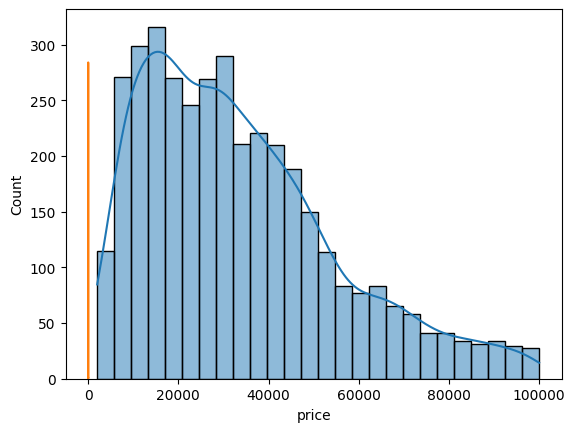

In [364]:
df['price'].describe()
sns.histplot(df[df['price'] < 100000]['price'], kde=True)
sns.histplot(np.log1p(df['price']), kde=True)


In [365]:
df.isnull().sum()   

brand              0
model              0
model_year         0
milage             0
fuel_type          0
engine             0
transmission       0
ext_col            0
int_col            0
accident           0
clean_title      596
price              0
engine_num         0
accident_flag      0
dtype: int64

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          4009 non-null   object 
 1   model          4009 non-null   object 
 2   model_year     4009 non-null   int64  
 3   milage         4009 non-null   float64
 4   fuel_type      4009 non-null   object 
 5   engine         4009 non-null   object 
 6   transmission   4009 non-null   object 
 7   ext_col        4009 non-null   object 
 8   int_col        4009 non-null   object 
 9   accident       4009 non-null   object 
 10  clean_title    3413 non-null   object 
 11  price          4009 non-null   float64
 12  engine_num     4009 non-null   float64
 13  accident_flag  4009 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 438.6+ KB


There are 2 kinds of features:
1. Numerical feature
model_year
milage
engine_num (after extracting numbers)

2. Categorical features
brand
model
fuel_type
transmission
ext_col
int_col
accident

clean_title - removed as this is a redundant feature

# Univariate EDA for numerical features 
1. Histograms for numerical features 

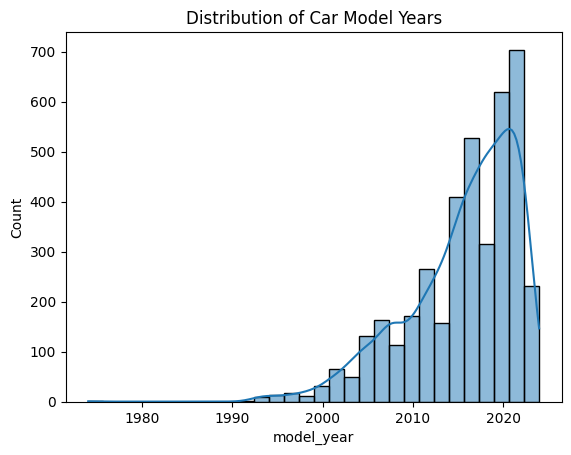

In [367]:
sns.histplot(df['model_year'], kde=True, bins=30)
plt.title('Distribution of Car Model Years')
plt.show()  

# histogram inference for model_year column
1. the histogram is left skewed 
2. oldest cars are before 1980 around 1970s, Old cars (before 2000) are very rare, almost outliers.
→ They may need special handling or removal.
3. and latest/current cars between 2020 (peak) to 2024, model can esily predict the current aged cars
4. Most cars in the dataset are NEWER models.→ The model will learn best about newer cars.
5. Feature Engineering Insight:
We should create:

car_age = 2024 - model_year
Because age is more linear than year.

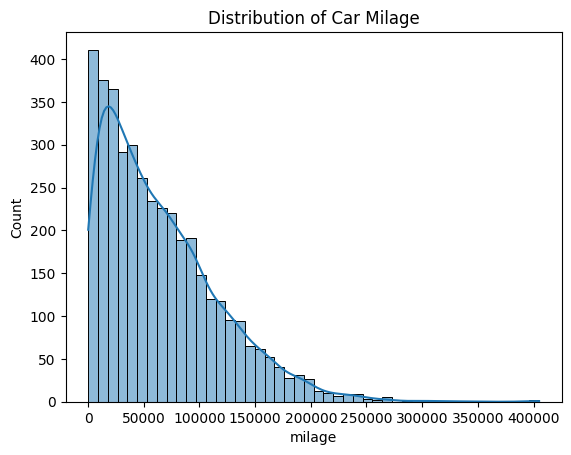

In [368]:
sns.histplot(df['milage'], kde=True)
plt.title('Distribution of Car Milage')
plt.show()

# histogram inference for mileage column
1. the histogram for mileage column is right-skewed
2. Mileage has huge variance → needs scaling & possibly capping.
    Extreme values will hurt linear regression.
2. Tail goes up to 400,000 → MASSIVE outliers.
    Needs:
    Log transform
    Scaling
    Outlier removal
3. Most cars between 5,000–70,000 miles.
4. Most cars are lightly used (below 70,000 miles).
5. Zero mileage may represent:
    Brand new cars
    Missing but filled incorrectly
    Data input errors

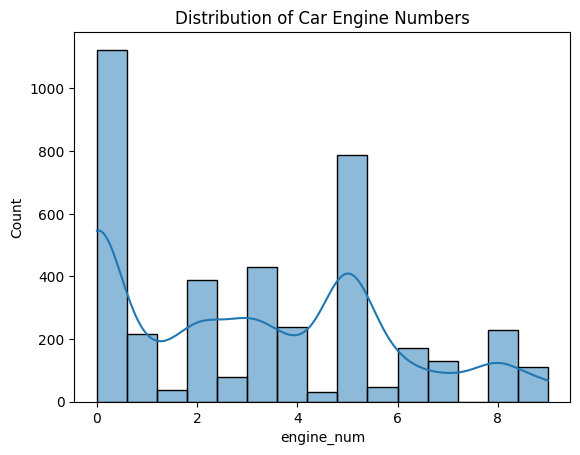

In [369]:
sns.histplot(df['engine_num'], kde=True)
plt.title('Distribution of Car Engine Numbers')
plt.show()

# extracted numeric engine size from text:
# Example engines:
# 2.0L
# 3.5L
# 5.0L

# So engine_num shows “Engine capacity in liters” (approx).

Interpretation of your Engine Num histogram:

The most common value is 0.0
→ This means something went wrong OR some engines could not be parsed.
→ These zeros are NOT real engine values.
→ They need fixing or removal.
1. Many 0.0 values → these are invalid engine sizes.

2. Peaks around 2.0L, 3.0L, 3.5L, 5.0L
These are typical/ common car engine sizes.

3. Right skewed distribution or multimodal distribution.
Most cars have smaller engines (2.0L to 3.5L).
Few cars have big engines (5L, 6L, 8L).

✔ Feature Engineering Insight:

Replace engine_num = 0 with NaN then impute
Or remove rows with 0 if they are many errors

Create a feature:
engine_is_large = engine_num > 3.5

In [370]:
# 1. create car age
df['car_age'] = 2024 - df['model_year']

# 2. mileage log
df['milage_log'] = np.log1p(df['milage'])

# 3. price log
df['price_log'] = np.log1p(df['price'])

# 4. engine number repair
df['engine_num_zero_flag'] = (df['engine_num'] == 0).astype(int)
df['engine_num'] = df['engine_num'].replace(0, np.nan)
df['engine_num'] = df['engine_num'].fillna(df['engine_num'].median())

# 5. (optional) remove extreme mileage outliers
df = df[df['milage'] <= df['milage'].quantile(0.99)]

df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_num,accident_flag,car_age,milage_log,price_log,engine_num_zero_flag
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,5.0,1,11,10.839601,9.239996,1
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8,1,3,10.455733,10.545499,0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,3.5,0,2,10.015610,10.907771,0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,4.0,0,9,11.395279,9.648660,0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0,0,3,9.193804,10.463103,0


# Univariate EDA for Categorical Columns using bar chart
for EACH Categforical column we determine the :
1. Value counts
2. Bar plot
3. Interpret:
    Which categories dominate?
    Are there rare categories?
    Are there dirty categories?
    Do we need to merge any?
    Does this feature look useful?

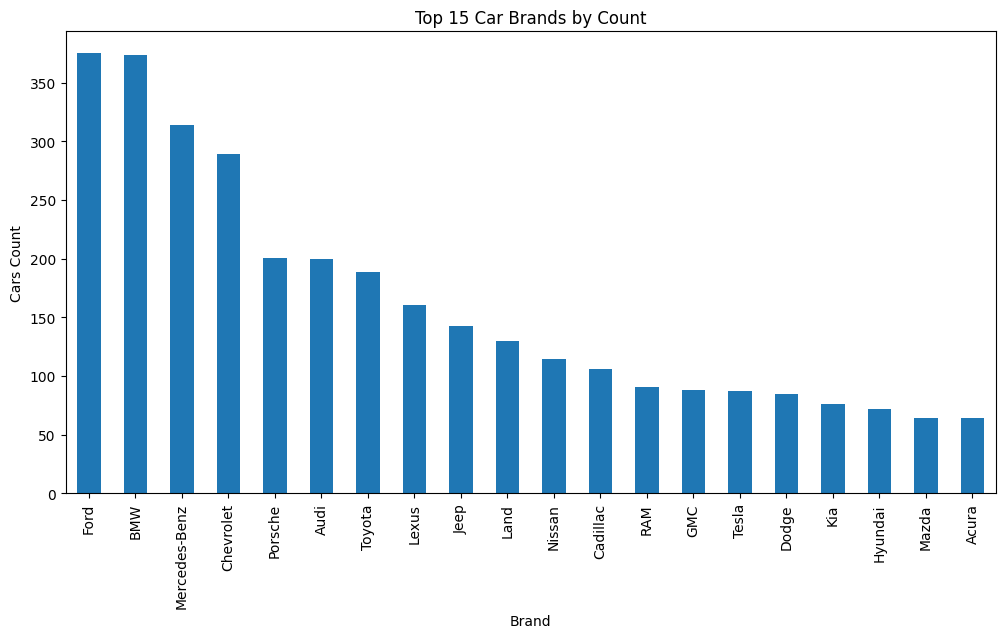

In [371]:
# Univariate EDA for categorial features

# for brand
plt.figure(figsize=(12,6))
df['brand'].value_counts().head(20).plot(kind='bar')
plt.title('Top 15 Car Brands by Count')
plt.xlabel('Brand')
plt.ylabel('Cars Count')
plt.show()


# inference for the brand column

1. The dataset is dominated by luxury & premium brands and hence the dataset is imbalanced -
    Ford ≈ 380
    BMW ≈ 375
    Mercedes-Benz ≈ 315
    Chevrolet ≈ 290
    (and so on)

    - Interpretation:
    The dataset is not general-market random.
    It is skewed toward luxury and premium vehicles.

    - This matters because:
    Prices will be higher overall
    Brand is highly predictive of price
    The dataset might not generalize to low-cost car markets

2. brand WILL be among top 3 most important features in Random Forest/XGBoost.
    Brand often correlates with:
        engine type
        drivetrain
        safety features
        mileage patterns
        accident likelihood
        owner behavior

3. For this dataset, we don't merge high-value rare brands.
    We ONLY merge when:
        A category truly has negligible count (<10)
        AND it does not carry unique value for prediction
        AND merging does not lose meaning

4. We should use Encoding strategy
    - One-Hot Encoding works well because models like Random Forest handle sparse vectors,
    we retain brand-specific signals, Most brands appear enough times (>20).

    - Target Encoding is also effective due to the larger number of unique brands (57).

    -Brand correlates with model, year, engine type, and mileage.We must monitor multicollinearity later in model training.
----------------------------------------------------------------------
1. The dataset is highly imbalanced across brands

Top brands: Ford, BMW, Mercedes-Benz, Chevrolet
These dominate with 300–380 cars each.
Many brands have under 50 samples → too rare to model individually.

- Implication:
Models may overfit on rare brands unless grouped.

2. Brand is a STRONG predictor of price (domain logic)

Because in the real world:
Luxury brands (BMW, Mercedes, Audi, Porsche) → higher resale price
Mass-market brands (Ford, Chevrolet, Toyota) → lower resale price
    Brand acts like a proxy for:
    Vehicle class
    Build quality
    Driving experience
    Demand in used-car market

3. What we should do with rare categories
    Instead of “below 100 → merge into Other”, a better approach is:
- Strategy used by top Kaggle competitors:
    Compute value counts
    Keep brands that contribute at least 1% of data (~40 cars here)
    Merge all others into "Other"
    This prevents:
    Sparse one-hot vectors
    Overfitting
    Noise from rare brands

In [372]:
df['fuel_type'].value_counts()

fuel_type
Gasoline             3284
Unknown Fuel Type     213
Hybrid                191
E85 Flex Fuel         136
Diesel                108
Plug-In Hybrid         34
Other                   2
Name: count, dtype: int64

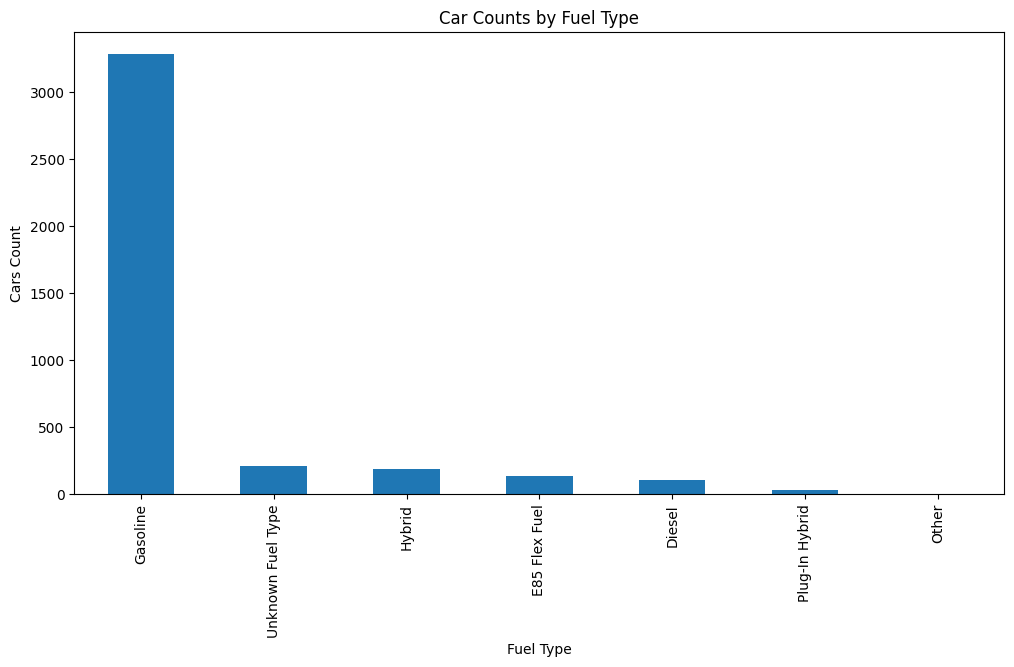

In [373]:
# for fuel type
plt.figure(figsize=(12,6))
df['fuel_type'].value_counts().plot(kind='bar')
plt.title('Car Counts by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Cars Count')        
plt.show()

# inference for the fuel_type column

1. Fuel Type is extremely imbalanced
    - ~3300 gasoline cars out of 4009
    - All other categories are <250

Encoding must be done carefully so the model doesn't overfit rare types.
2. Gasoline dominance means this feature may have LOW variance because -
    If 80%+ of all samples are the same category, the model:
    Cannot learn much from this feature
    It contributes little signal
    fuel type will likely be a weak predictor.

In [374]:
# for model column
print("Unique count of each car model:", df['model'].value_counts())
print("Total number of unique car models:", df['model'].nunique())


Unique count of each car model: model
M3 Base                    30
F-150 XLT                  24
Corvette Base              22
1500 Laramie               18
Model Y Long Range         17
                           ..
MC20 Base                   1
911 Carrera 4 Cabriolet     1
488 GTB Base                1
Navigator Premiere          1
Taycan                      1
Name: count, Length: 1883, dtype: int64
Total number of unique car models: 1883


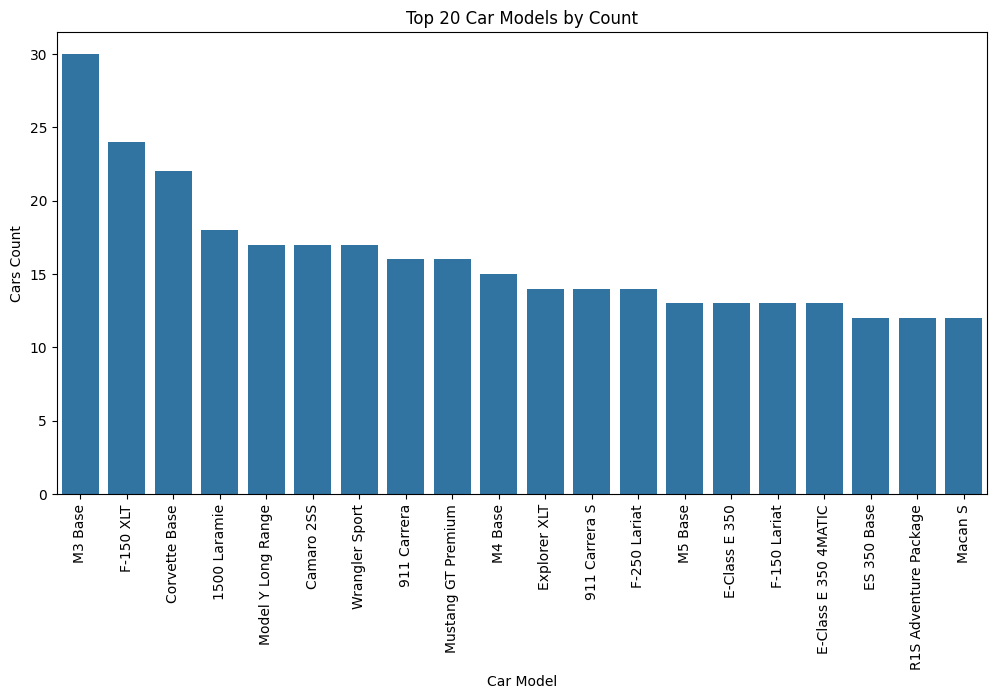

In [375]:
df['model'].value_counts().head(20)
top_models = df['model'].value_counts().head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_models.index, y=top_models.values)
plt.title('Top 20 Car Models by Count')
plt.xlabel('Car Model')             
plt.ylabel('Cars Count')
plt.xticks(rotation=90)
plt.show()

# inference for model column 

1. Model column has very high cardinality 
    Total rows = 4009
    Unique models = 1883
    Almost every car model is unique - This is called sparse high-cardinality categorical data.
2. we cannot apply one-hot encoding, 
    - it would create 1800+ dummy variables,
    -  the datset would become extremely sparse.
    - linear regression breaks 
    - tree models will overfit 
    - training the model will become slow & unstable
    This is a noisy and too granular feature
3. only few models have > 15 counts.
4. Instead of using raw model names, feature engineering should extract meaningful components:
        Vehicle type (SUV, sedan, truck, coupe, etc.)
        Performance category
        Trim level
5. Rare model names can be grouped under a single category.

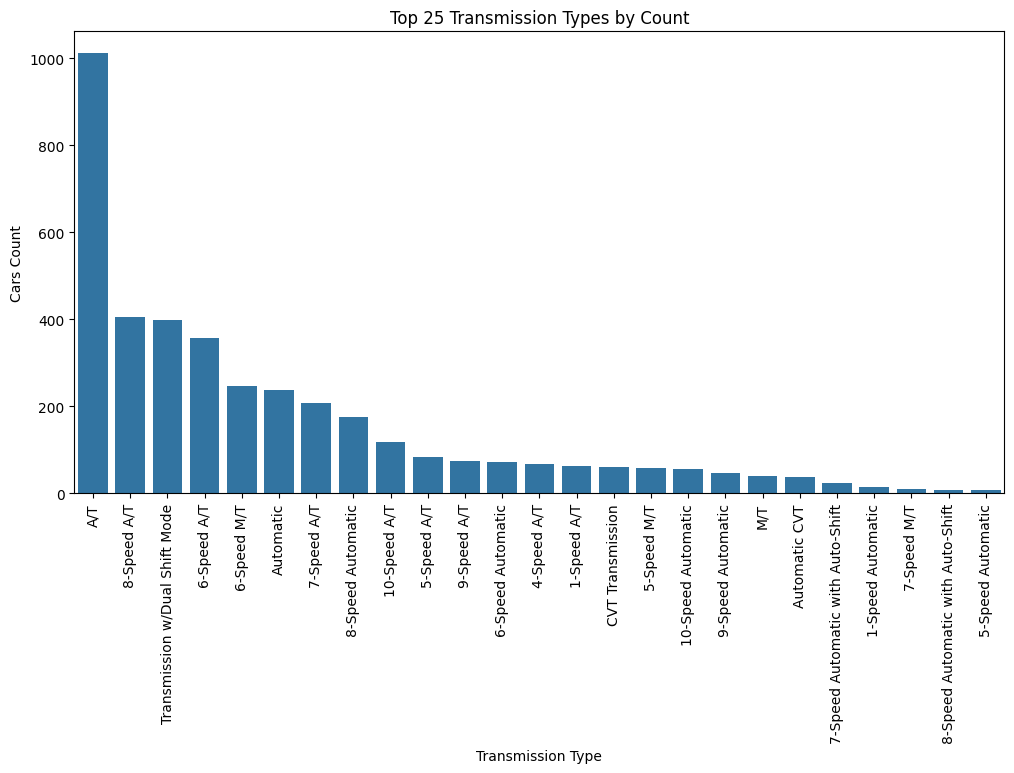

In [376]:
# for transmission column

plt.figure(figsize=(12,6))
trans_counts = df['transmission'].value_counts().head(25)
sns.barplot(x=trans_counts.index, y=trans_counts.values)
plt.title('Top 25 Transmission Types by Count')
plt.xlabel('Transmission Type')
plt.ylabel('Cars Count')
plt.xticks(rotation=90)
plt.show()

# inference for transmission column
A/T dominates (modern cars) - extremely imbalanced dataset
Many rare types → group rare (<50 count) into “Other Transmission”
Use one-hot or frequency encoding later
keeping this feature it affects - car age, fuel economy, performance, price

Accident value counts:
 accident
None reported                             2887
At least 1 accident or damage reported     969
No information                             112
Name: count, dtype: int64


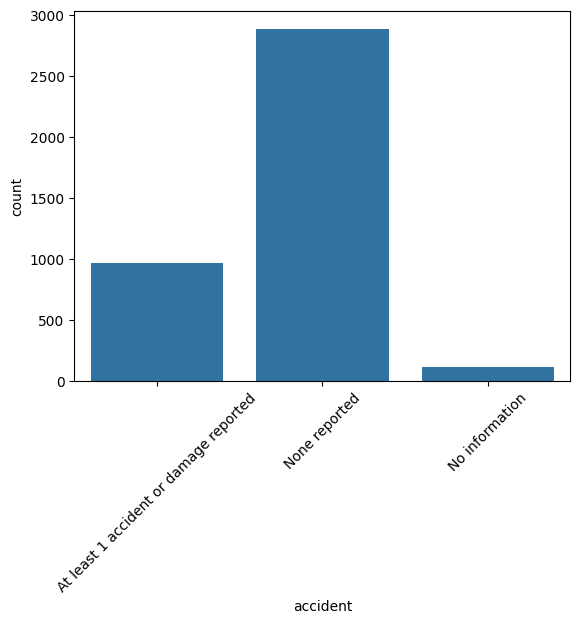

In [377]:
# for accident column
print("Accident value counts:\n", df['accident'].value_counts())
sns.countplot(x=df['accident'])
plt.xticks(rotation=45)
plt.show()


# inference for accident column

Strong binary categorical feature
Accident_flag = 1 → price penalty likely
Rare category “No information” → merge to “Unknown” 
this column can be dropped after encoding & accident_flag

External Color value counts:
 ext_col
Black                       895
White                       807
Gray                        492
Silver                      368
Blue                        346
                           ... 
Anthracite Blue Metallic      1
Moonlight Cloud               1
Silver Mist                   1
Cirrus Silver Metallic        1
C / C                         1
Name: count, Length: 319, dtype: int64
Total number of unique external colors: 319


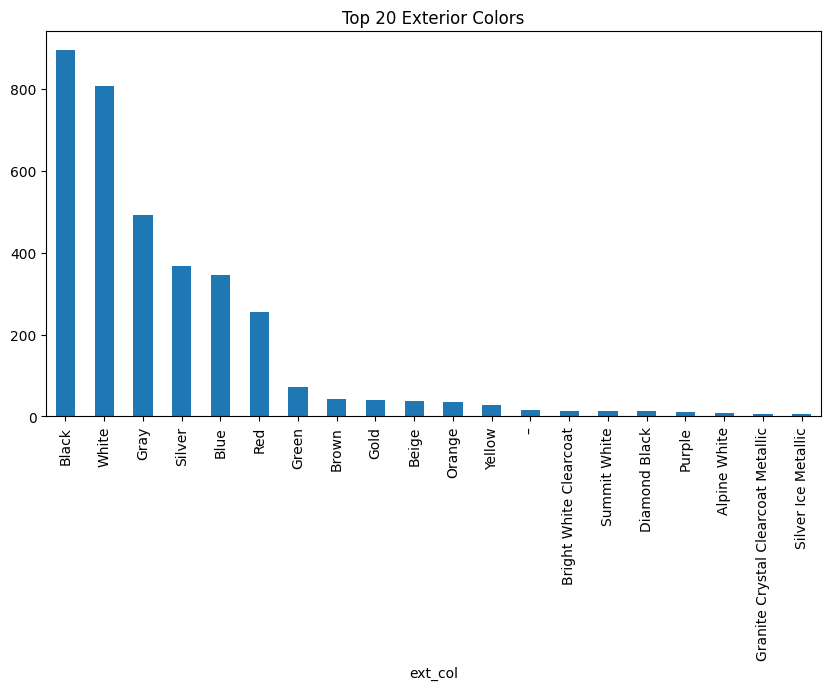

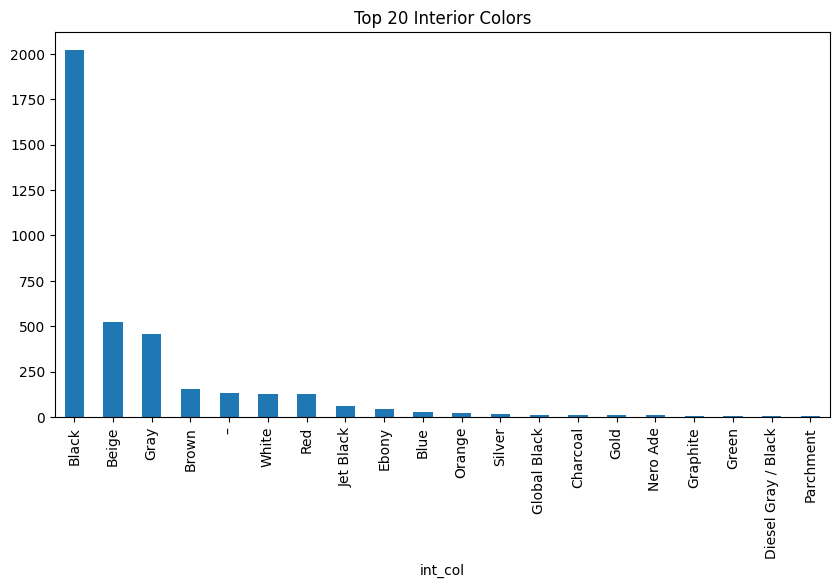

In [378]:
# for ext_col column
print("External Color value counts:\n", df['ext_col'].value_counts())
print("Total number of unique external colors:", df['ext_col'].nunique())
import matplotlib.pyplot as plt

df['ext_col'].value_counts().head(20).plot(kind='bar', figsize=(10,5))
plt.title('Top 20 Exterior Colors')
plt.show()

df['int_col'].value_counts().head(20).plot(kind='bar', figsize=(10,5))
plt.title('Top 20 Interior Colors')
plt.show()



External Color value counts:
 ext_col
Black                       895
White                       807
Gray                        492
Silver                      368
Blue                        346
                           ... 
Anthracite Blue Metallic      1
Moonlight Cloud               1
Silver Mist                   1
Cirrus Silver Metallic        1
C / C                         1
Name: count, Length: 319, dtype: int64
Total number of unique external colors: 319


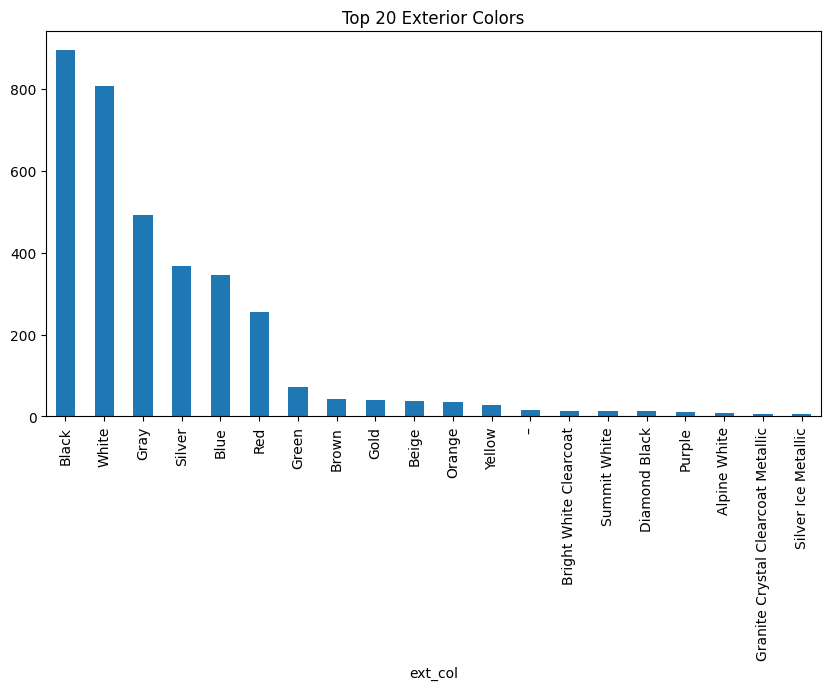

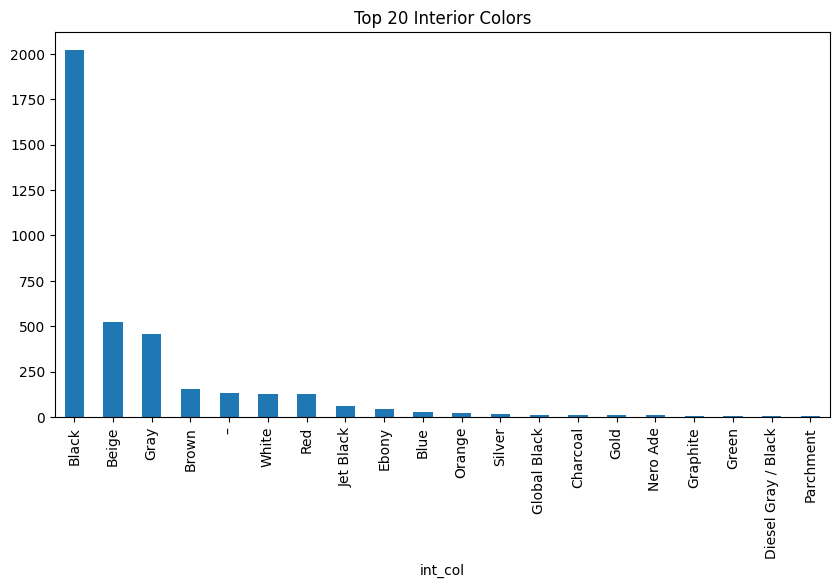

In [379]:
# for ext_col column
print("External Color value counts:\n", df['ext_col'].value_counts())
print("Total number of unique external colors:", df['ext_col'].nunique())   
import matplotlib.pyplot as plt

df['ext_col'].value_counts().head(20).plot(kind='bar', figsize=(10,5))
plt.title('Top 20 Exterior Colors')
plt.show()

df['int_col'].value_counts().head(20).plot(kind='bar', figsize=(10,5))
plt.title('Top 20 Interior Colors')
plt.show()


# Data Cleaning & Feature Engineering

 1. Numeric columns fixes - 
    ## model_year - 
    left-skewed → many newer cars, older cars = very few
    Fix - 
    - Create new feature:
        car_age = current_year - model_year and then drop model_year
    - No scaling needed yet — this will be handled in the pipeline.

    ## milage - 
    right skewed, heavy outliers , distort linear models & tree models
    Fix - 
    - Create log transformations ---> milage_log = np.log1p(milage)
    - Keep original milage too for tree models
    - train and test on both the models linear / tree models to test which gives better performance

    ## price - 
    extremely right skewed , outliers upto 3 millions
    fix - 
    - log transformation -----> price_log = np.log1p(price)
    - Predict on price_log
    - Then convert back:--------> pred_price = np.expm1(pred_log)

    ## engine_num
    lots of 0's, outliers, distribution is irregular
    fix - 
    - Create binary flag:--------------> engine_num_zero_flag = (engine_num == 0).astype(int)
    - decide to keep the features/ drop later


2. Categorical Fixes - 
    

In [380]:
# 1. Fill missing values  
df['fuel_type'] = df['fuel_type'].fillna('Unknown')

# 2. Clean weird categories  
df['fuel_type'] = df['fuel_type'].replace(['–', '-', 'not supported'], 'Other')

# 3. Group rare categories  
fuel_counts = df['fuel_type'].value_counts()
rare_fuels = fuel_counts[fuel_counts < 50].index

df['fuel_type'] = df['fuel_type'].replace(rare_fuels, 'Other')


In [381]:
brand_counts = df['brand'].value_counts()
rare_brands = brand_counts[brand_counts < 20].index

df['brand'] = df['brand'].replace(rare_brands, 'Other')


In [382]:
df.drop('model', axis=1, inplace=True)


In [383]:
df['transmission'] = df['transmission'].str.upper()

df['transmission'] = df['transmission'].replace({
    'A/T': 'Automatic',
    'M/T': 'Manual',
})

df['transmission_simple'] = df['transmission'].apply(lambda x:
    'Automatic' if 'AUTO' in x else
    'Manual' if 'MANUAL' in x else
    'CVT' if 'CVT' in x else
    'Other'
)


In [384]:
# Exterior
ext_counts = df['ext_col'].value_counts()
rare_ext = ext_counts[ext_counts < 50].index
df['ext_col'] = df['ext_col'].replace(rare_ext, 'Other')

# Interior
int_counts = df['int_col'].value_counts()
rare_int = int_counts[int_counts < 50].index
df['int_col'] = df['int_col'].replace(rare_int, 'Other')


In [385]:
df['accident_flag'] = df['accident'].apply(lambda x: 
    1 if 'At least' in x else 0
)
df.drop('accident', axis=1, inplace=True)


In [386]:
df['milage_log'] = np.log1p(df['milage'])


In [387]:
df['price_log'] = np.log1p(df['price'])


In [388]:
df['car_age'] = 2025 - df['model_year']


In [389]:
median_engine = df[df['engine_num'] > 0]['engine_num'].median()
df['engine_num'] = df['engine_num'].replace(0, median_engine)

# extra flag if engine was originally 0
df['engine_num_zero_flag'] = df['engine_num'].apply(lambda x: 1 if x==0 else 0)


In [390]:
df.drop(['engine'], axis=1, inplace=True)


In [391]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['milage_log', 'engine_num', 'car_age']

df[num_cols] = scaler.fit_transform(df[num_cols])


In [392]:
df['clean_title'] = df['clean_title'].fillna('No')

df['clean_title_flag'] = df['clean_title'].apply(
    lambda x: 1 if str(x).strip().lower()=='yes' else 0
)


In [393]:
df['transmission'] = df['transmission'].str.upper().str.strip()

df['transmission_simple'] = df['transmission'].apply(
    lambda x: 'AUTOMATIC' if 'AUTO' in x else
              'MANUAL' if 'MANUAL' in x or 'M/T' in x else
              'OTHER'
)


In [394]:
df['ext_col'] = df['ext_col'].str.lower().str.strip()
df['int_col'] = df['int_col'].str.lower().str.strip()

# Keep top 10 categories only
top_ext = df['ext_col'].value_counts().nlargest(10).index
df['ext_col_simple'] = df['ext_col'].apply(lambda x: x if x in top_ext else 'other')

top_int = df['int_col'].value_counts().nlargest(10).index
df['int_col_simple'] = df['int_col'].apply(lambda x: x if x in top_int else 'other')


In [395]:
df.head()

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,clean_title,price,engine_num,accident_flag,car_age,milage_log,price_log,engine_num_zero_flag,transmission_simple,clean_title_flag,ext_col_simple,int_col_simple
0,Ford,2013,51000.0,E85 Flex Fuel,6-SPEED A/T,black,black,Yes,10300.0,0.251171,1,0.435256,0.212262,9.239996,0,OTHER,1,black,black
1,Hyundai,2021,34742.0,Gasoline,8-SPEED AUTOMATIC,other,gray,Yes,38005.0,-0.404373,1,-0.893919,-0.108255,10.545499,0,AUTOMATIC,1,other,gray
2,Lexus,2022,22372.0,Gasoline,AUTOMATIC,blue,black,No,54598.0,-0.568259,0,-1.060066,-0.475744,10.907771,0,AUTOMATIC,0,blue,black
3,INFINITI,2015,88900.0,Hybrid,7-SPEED A/T,black,black,Yes,15500.0,-0.295116,0,0.102963,0.676237,9.648660,0,OTHER,1,black,black
4,Audi,2021,9835.0,Gasoline,8-SPEED AUTOMATIC,other,black,No,34999.0,-1.387689,0,-0.893919,-1.161927,10.463103,0,AUTOMATIC,0,other,black
